In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
trainx = np.load('train_x_60.npy')

In [10]:
trainy = np.load('train_y_60.npy')

In [11]:
print(trainx.shape)

(60000, 28, 28)


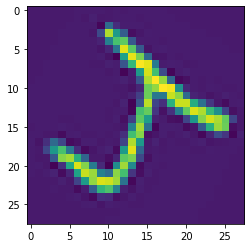

In [16]:
plt.imshow(trainx[2])

In [32]:
print(trainy[10:20])

[3 5 3 6 1 7 2 8 6 9]


In [26]:
rot60_probs = np.load('/Users/xuanchen/Desktop/adversarial/MMCE/mmce_rot60_probs.npy')

In [35]:
print(rot60_probs.shape)
print(rot60_probs[10:12])

(60000, 10)
[[5.70856537e-05 1.17654717e-02 1.45856908e-03 8.35777760e-01
  6.78268843e-04 1.29025996e-01 4.86133824e-04 1.29158795e-02
  2.28220830e-03 5.55267511e-03]
 [3.82689323e-04 4.07105424e-02 3.48812464e-04 1.32177934e-01
  1.18985143e-03 7.60355890e-01 5.61050922e-02 5.19475841e-04
  8.07751715e-03 1.32250614e-04]]


In [28]:
labels = np.argmax(rot60_probs, axis = 1)

In [29]:
print(labels.shape)

(60000,)


In [31]:
print(labels[10:20])

[3 5 5 4 2 5 7 4 6 9]


In [23]:
def compute_accuracies_at_confidences(labels, probs, thresholds):
    """Compute accuracy of samples above each confidence threshold.
    Args:
    labels: Array of integer categorical labels.
    probs: Array of categorical probabilities.
    thresholds: Array of floating point probability thresholds in [0, 1).
    Returns:
    accuracies: Array of accuracies over examples with confidence > T for each T
        in thresholds.
    counts: Count of examples with confidence > T for each T in thresholds.
    """
    assert probs.shape[:-1] == labels.shape

    predict_class = probs.argmax(-1)
    predict_confidence = probs.max(-1)

    shape = (len(thresholds),) + probs.shape[:-2]
    accuracies = np.zeros(shape)
    counts = np.zeros(shape)

    eq = np.equal(predict_class, labels)
    for i, thresh in enumerate(thresholds):
        mask = predict_confidence >= thresh
        counts[i] = mask.sum(-1)
        accuracies[i] = np.ma.masked_array(eq, mask=~mask).mean(-1)
    return accuracies, counts

In [24]:
accuracies, counts = compute_accuracies_at_confidences(trainy, rot60_probs, [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

In [25]:
print(accuracies, counts)

[0.25933333 0.25951829 0.26398276 0.27330622 0.28424917 0.29583946
 0.30720286 0.32054257 0.33252119] [60000. 59911. 57553. 50405. 40855. 31943. 24046. 16809.  9440.]
